In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset info CSV
df = pd.read_csv("results/dataset/dataset_info.csv")

# Extract dataset group from the 'dataset' column prefix
def extract_group(name):
    if name.startswith("autogluon/chronos"):
        return "autogluon" #"Chronos"
    elif name.startswith("Salesforce/lotsa"):
        return "Salesforce" #"Lotsa"
    elif name.startswith("ett"):
        return "ETT"
    else:
        return "other"

df["group"] = df["dataset"].apply(extract_group)

In [3]:
# Set seaborn style
plt.rcParams["figure.figsize"] = (15, 6)

In [4]:
GROUP_PALETTE = {
    #"Lotsa": "lawngreen",
    "Salesforce": "lawngreen",
    #"Chronos": "lightskyblue",
    "autogluon": "lightskyblue",
    "ETT": "deeppink",
    "other": "gray"
}

In [5]:
# Compute statistics
pivot_table = df.groupby("group").agg({
    "ts_len": ["mean", "std", "min", "max"],
    "num_variates": ["mean", "std", "min", "max"],
    "item_id": "count"
})

# Rename columns for clarity
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table = pivot_table.rename(columns={"item_id_count": "num_series"})

# Round for better display
pivot_table = pivot_table.round(4)

pivot_table

,ts_len_mean,ts_len_std,ts_len_min,ts_len_max,num_variates_mean,num_variates_std,num_variates_min,num_variates_max,num_series
group,,,,,,,,,
ETT,21600.0000,14964.9190,8640,34560,1.0000,0.000,1,1,4
Salesforce,7623.5184,25328.5393,2,527040,2093.3613,9837.617,1,614880,74104
autogluon,23109.1546,40457.5376,156,140256,1.0000,0.000,1,1,3934


In [6]:
74104 + 3934 + 4

78042

/tmp/ipykernel_910268/1907978796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="group", palette=GROUP_PALETTE)


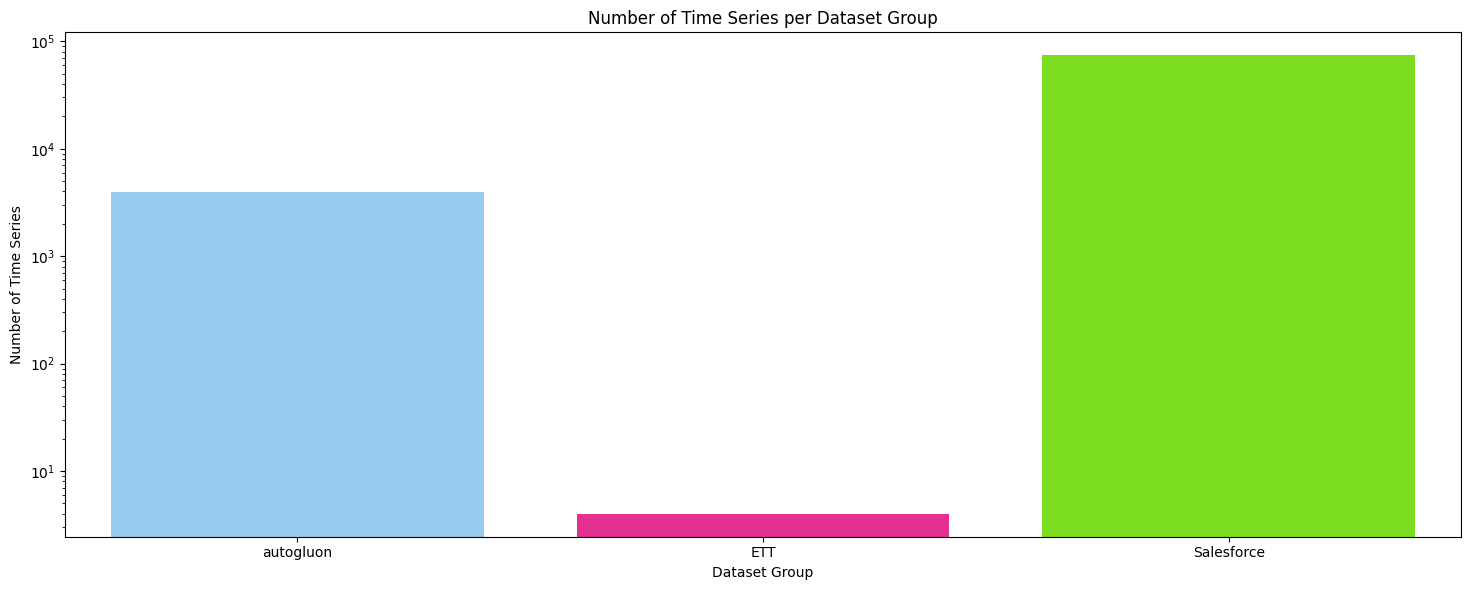

In [7]:
# === 1. Barplot: Number of time series per dataset group ===
plt.figure()
sns.countplot(data=df, x="group", palette=GROUP_PALETTE)
plt.title("Number of Time Series per Dataset Group")
plt.xlabel("Dataset Group")
plt.ylabel("Number of Time Series")
plt.tight_layout()
plt.yscale("log")
plt.savefig("figures/plot_num_series_per_dataset.pdf")
plt.show()

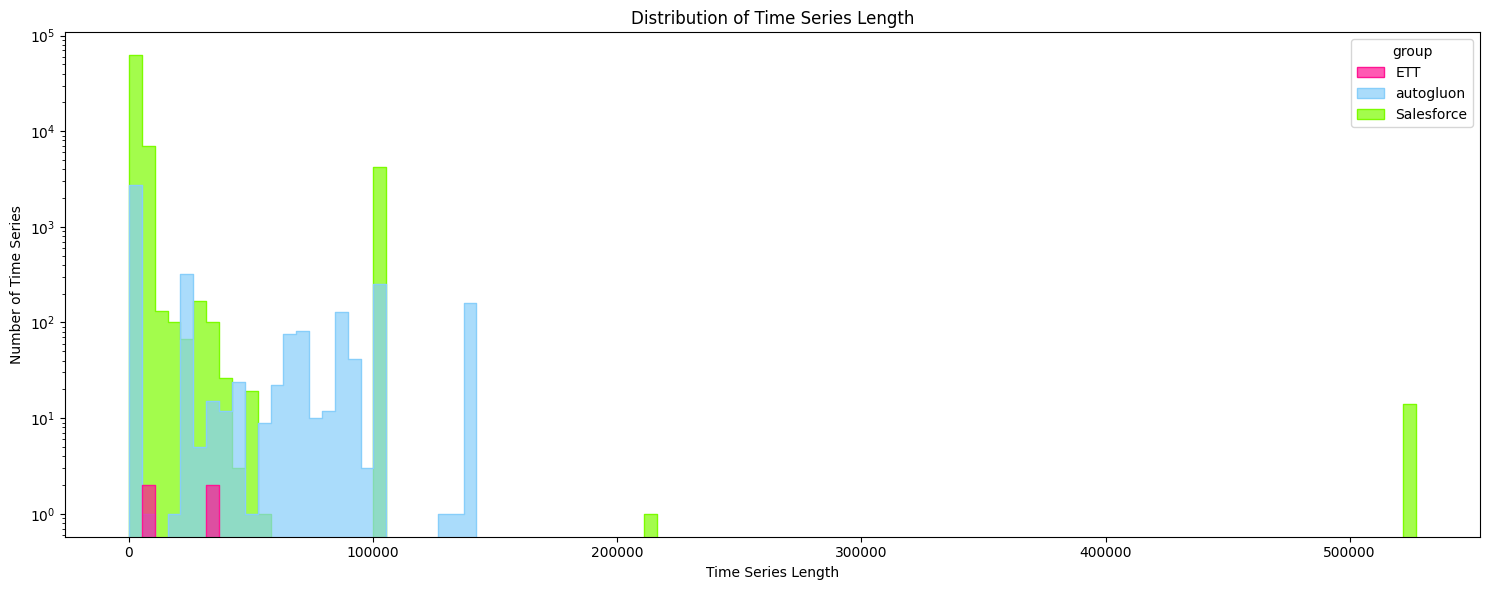

In [8]:
# === 2. Histogram: Time series length (ts_len) distribution ===
plt.figure()
sns.histplot(
    data=df, x="ts_len", hue="group", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["ETT", "autogluon", "Salesforce"]) #"Chronos", "Lotsa"])
plt.title("Distribution of Time Series Length")
plt.xlabel("Time Series Length")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/plot_ts_len_distribution.pdf")
plt.show()

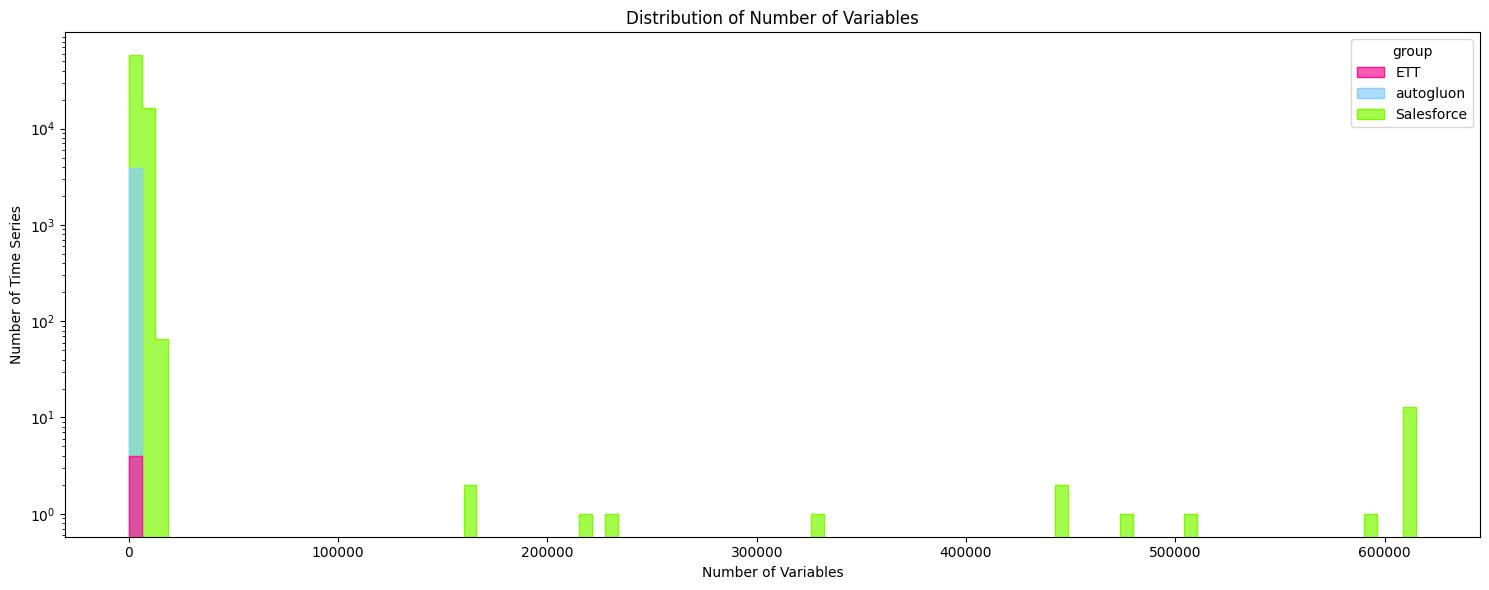

In [9]:
# === 3. Histogram: Number of variables per time series ===
plt.figure()
sns.histplot(
    data=df, x="num_variates", hue="group", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["ETT", "autogluon", "Salesforce"]) #"Chronos", "Lotsa"])
plt.title("Distribution of Number of Variables")
plt.xlabel("Number of Variables")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/plot_num_variates_distribution.pdf")
plt.show()

In [10]:
df[df["group"]=="Chronos"]["num_variates"].unique(), df[df["group"]=="ETT"]["num_variates"].unique()

(array([], dtype=int64), array([1]))

In [11]:
FREQ_MAP = {
    "T": "1 min",
    "5T": "5 min",
    "10T": "10 min",
    "15T": "15 min",
    "30T": "30 min",
    "H": "1 hour",
    "1H": "1 hour",
    "6H": "6 hours",
    "D": "daily",
    "1D": "daily",
    "W": "weekly",
    "1W": "weekly",
    "W-SUN": "weekly",
    "M": "monthly",
    "MS": "monthly",      # Month Start
    "Q-DEC": "quarterly", # Quarterly ending in December
    "A-DEC": "yearly",    # Annual frequency ending in December
}

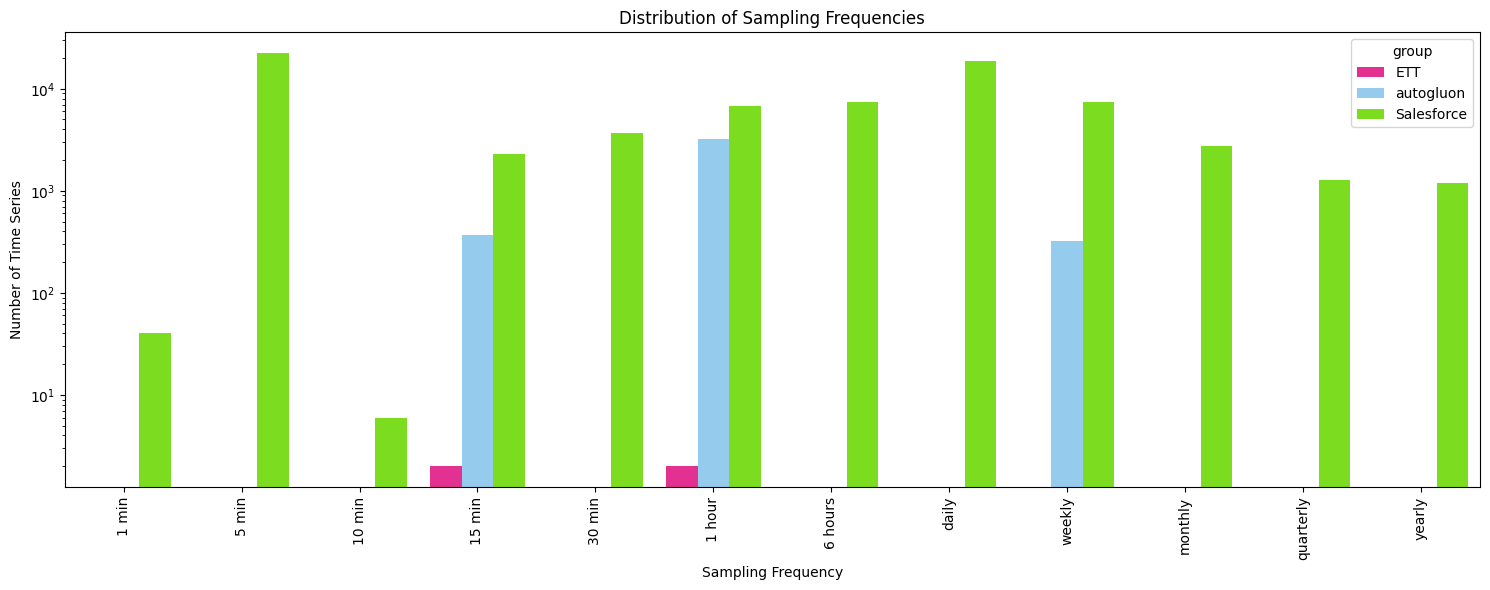

In [12]:
# === 4. Barplot: Frequency distribution per dataset group ===

# Map raw frequencies to human-readable labels
df["freq_label"] = df["freq"].map(FREQ_MAP).fillna("other")

# Order of the frequencies for plotting
FREQ_ORDER = [
    "1 min", "5 min", "10 min", "15 min", "30 min",
    "1 hour", "6 hours",
    "daily", "weekly", "monthly", "quarterly", "yearly"
]

# Plot the frequency distribution grouped by dataset group
plt.figure()
sns.countplot(
    data=df, x="freq_label", hue="group",
    order=FREQ_ORDER, palette=GROUP_PALETTE,
    hue_order=["ETT", "autogluon", "Salesforce"]) #"Chronos", "Lotsa"])
plt.title("Distribution of Sampling Frequencies")
plt.xlabel("Sampling Frequency")
plt.ylabel("Number of Time Series")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/plot_freq_distribution.pdf")
plt.show()

### Splitted Dataset

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load the dataset info CSV
df = pd.read_csv("results/dataset/dataset_splitted_info.csv")

# Extract dataset group from the 'dataset' column prefix
def extract_group(name):
    if name.startswith("autogluon/chronos"):
        return "Chronos"
    elif name.startswith("Salesforce/lotsa"):
        return "Lotsa"
    elif name.startswith("ett"):
        return "ETT"
    else:
        return "other"

df["group"] = df["dataset"].apply(extract_group)

/tmp/ipykernel_910268/711309137.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("results/dataset/dataset_splitted_info.csv")


In [15]:
# Set seaborn style
plt.rcParams["figure.figsize"] = (15, 6)

In [16]:
GROUP_PALETTE = {
    "Lotsa": "lawngreen",
    "Chronos": "lightskyblue",
    "ETT": "deeppink",
    "other": "gray"
}

In [17]:
# Compute statistics
pivot_table = df.groupby("group").agg({
    "ts_len": ["mean", "std", "min", "max"],
    "num_variates": ["mean", "std", "min", "max"],
    "item_id": "count"
})

# Rename columns for clarity
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table = pivot_table.rename(columns={"item_id_count": "num_series"})

# Round for better display
pivot_table = pivot_table.round(4)

pivot_table

,ts_len_mean,ts_len_std,ts_len_min,ts_len_max,num_variates_mean,num_variates_std,num_variates_min,num_variates_max,num_series
group,,,,,,,,,
Chronos,2292.8108,131.8126,734,2304,1.0,0.0,1,1,340243
ETT,2304.0000,0.0000,2304,2304,1.0,0.0,1,1,304
Lotsa,2295.3711,105.7851,512,2304,1.0,0.0,1,1,1961671


/tmp/ipykernel_910268/281858477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="group", palette=GROUP_PALETTE)


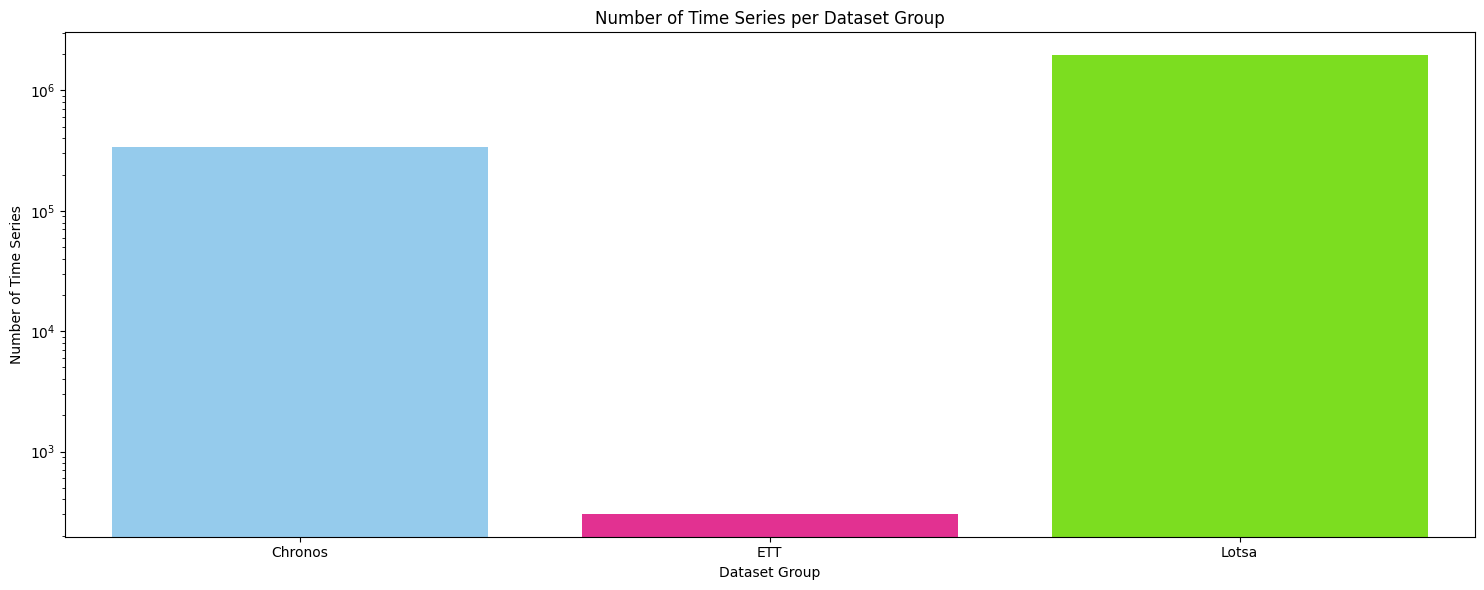

In [18]:
# === 1. Barplot: Number of time series per dataset group ===
plt.figure()
sns.countplot(data=df, x="group", palette=GROUP_PALETTE)
plt.title("Number of Time Series per Dataset Group")
plt.xlabel("Dataset Group")
plt.ylabel("Number of Time Series")
plt.tight_layout()
plt.yscale("log")
#plt.savefig("figures/plot_num_series_per_dataset_final.pdf")
plt.show()

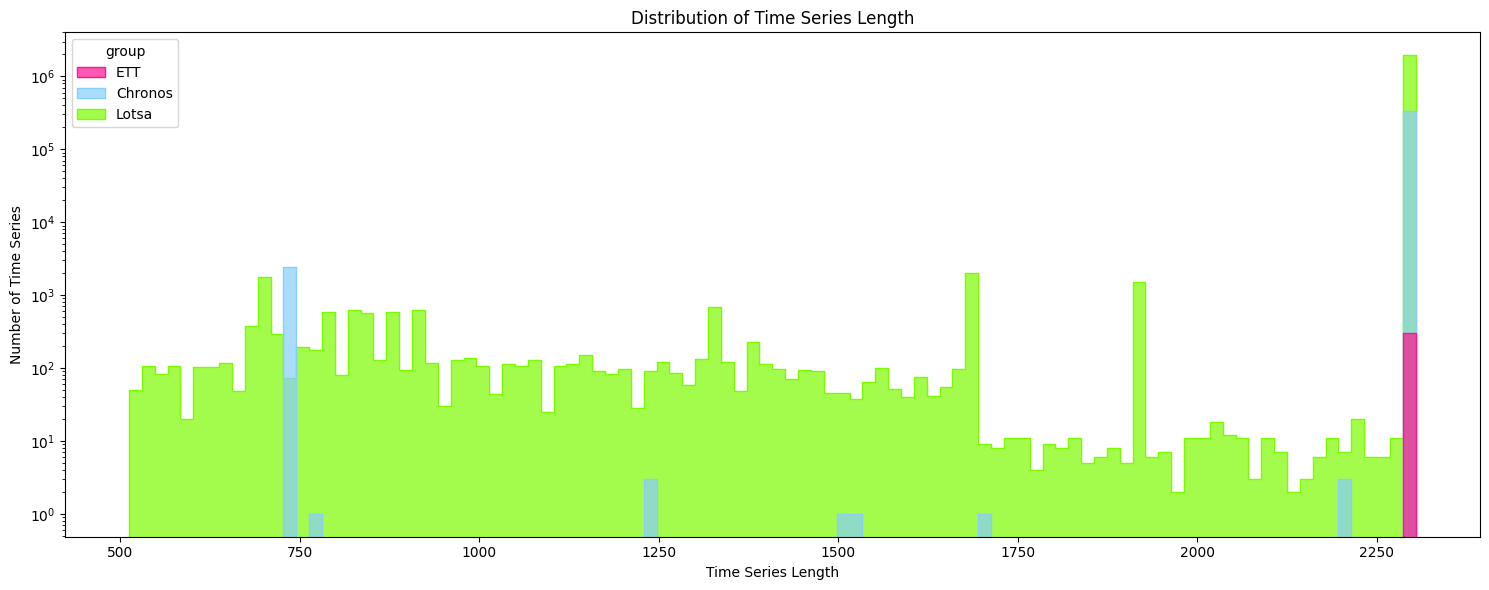

In [19]:
# === 2. Histogram: Time series length (ts_len) distribution ===
plt.figure()
sns.histplot(
    data=df, x="ts_len", hue="group", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["ETT", "Chronos", "Lotsa"])
plt.title("Distribution of Time Series Length")
plt.xlabel("Time Series Length")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
#plt.savefig("figures/plot_ts_len_distribution_final.pdf")
plt.show()

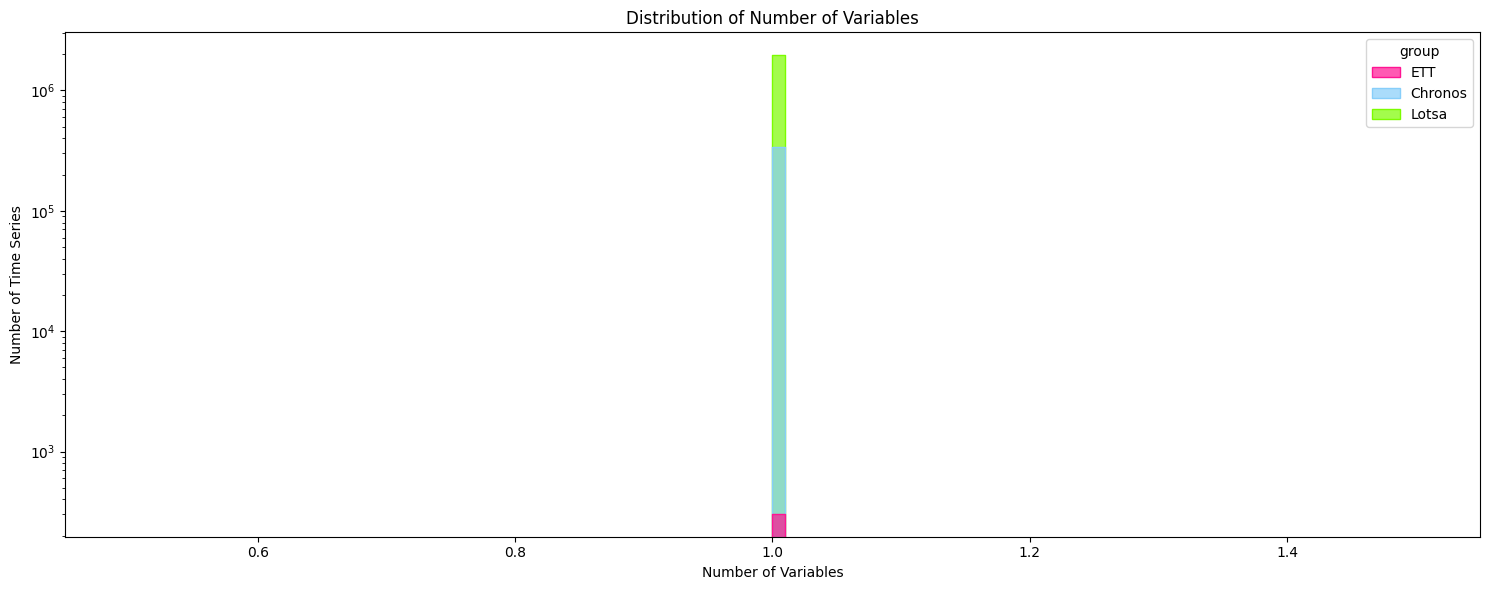

In [20]:
# === 3. Histogram: Number of variables per time series ===
plt.figure()
sns.histplot(
    data=df, x="num_variates", hue="group", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["ETT", "Chronos", "Lotsa"])
plt.title("Distribution of Number of Variables")
plt.xlabel("Number of Variables")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
#plt.savefig("figures/plot_num_variates_distribution_final.pdf")
plt.show()

In [21]:
FREQ_MAP = {
    "T": "1 min",
    "5T": "5 min",
    "10T": "10 min",
    "15T": "15 min",
    "30T": "30 min",
    "H": "1 hour",
    "1H": "1 hour",
    "6H": "6 hours",
    "D": "daily",
    "1D": "daily",
    "W": "weekly",
    "1W": "weekly",
    "W-SUN": "weekly",
    "M": "monthly",
    "MS": "monthly",      # Month Start
    "Q-DEC": "quarterly", # Quarterly ending in December
    "A-DEC": "yearly",    # Annual frequency ending in December
}

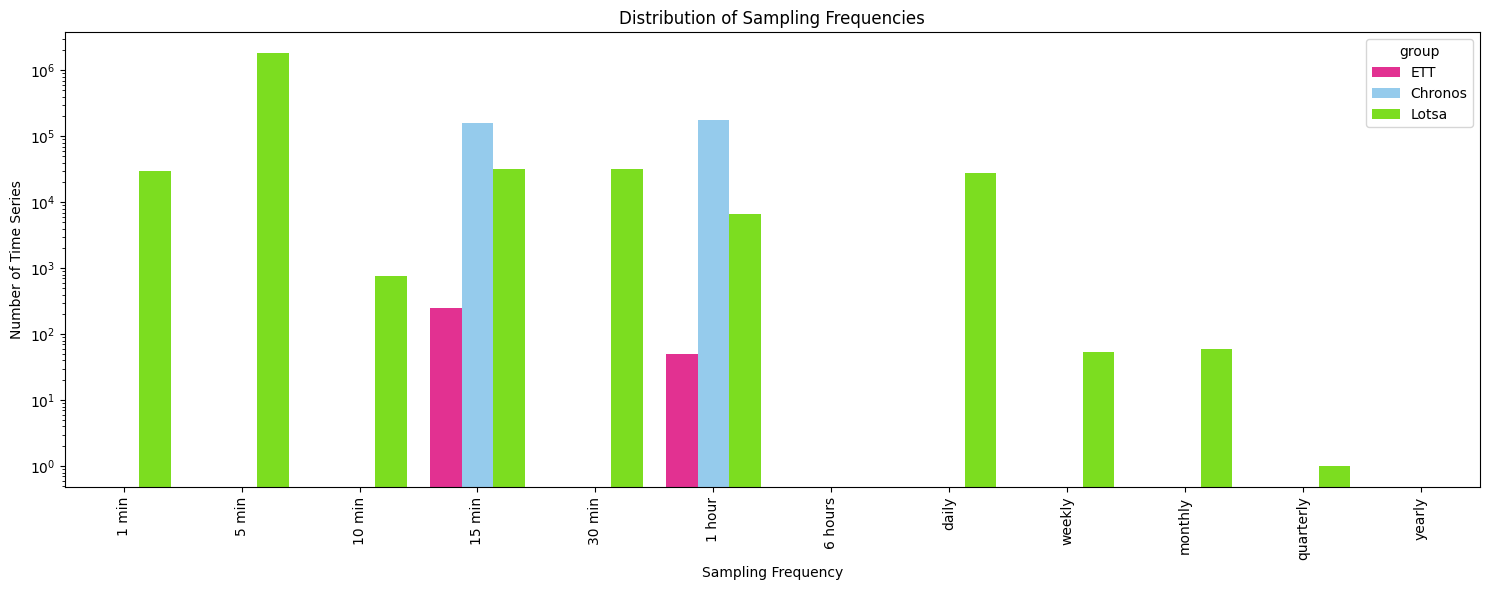

In [22]:
# === 4. Barplot: Frequency distribution per dataset group ===

# Map raw frequencies to human-readable labels
df["freq_label"] = df["freq"].map(FREQ_MAP).fillna("other")

# Order of the frequencies for plotting
FREQ_ORDER = [
    "1 min", "5 min", "10 min", "15 min", "30 min",
    "1 hour", "6 hours",
    "daily", "weekly", "monthly", "quarterly", "yearly"
]

# Plot the frequency distribution grouped by dataset group
plt.figure()
sns.countplot(
    data=df, x="freq_label", hue="group",
    order=FREQ_ORDER, palette=GROUP_PALETTE,
    hue_order=["ETT", "Chronos", "Lotsa"])
plt.title("Distribution of Sampling Frequencies")
plt.xlabel("Sampling Frequency")
plt.ylabel("Number of Time Series")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
#plt.savefig("figures/plot_freq_distribution_final.pdf")
plt.show()

### Final splitted dataset

In [23]:
# Load the dataset info CSV
df = pd.read_csv("results/dataset/dataset_splitted_train_val_info.csv", index_col=0)

In [24]:
GROUP_PALETTE = {
    "train": "lightskyblue",
    "val": "deeppink",
}

In [25]:
# Compute statistics
pivot_table = df.groupby("split").agg({
    "ts_len": ["mean", "std", "min", "max"],
    "num_variates": ["mean", "std", "min", "max", "count"],

})

# Rename columns for clarity
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table = pivot_table.rename(columns={"num_variates_count": "num_series"})

# Round for better display
pivot_table = pivot_table.round(4)

pivot_table

,ts_len_mean,ts_len_std,ts_len_min,ts_len_max,num_variates_mean,num_variates_std,num_variates_min,num_variates_max,num_series
split,,,,,,,,,
train,2295.0124,109.8626,512,2304,1.0,0.0,1,1,1841795
val,2294.9196,110.6332,512,2304,1.0,0.0,1,1,460423


In [26]:
1841795+460423

2302218

/tmp/ipykernel_910268/80141105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="split", palette=GROUP_PALETTE)


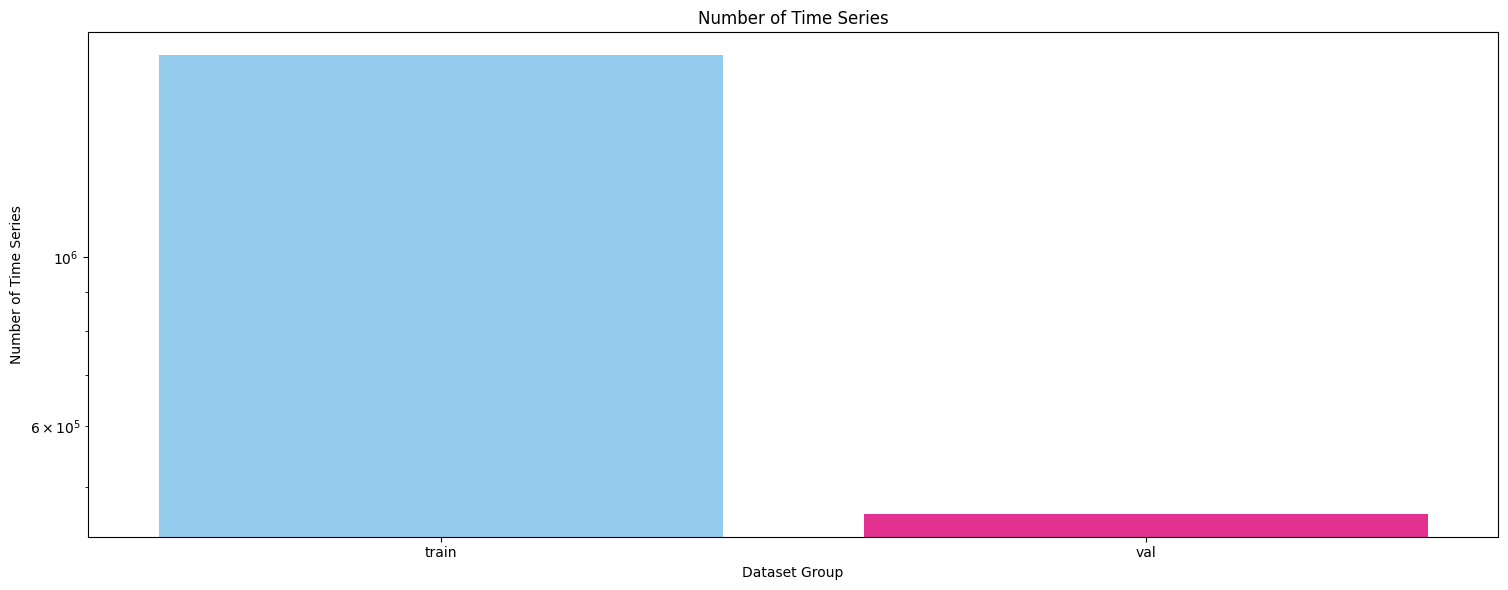

In [27]:
# === 1. Barplot: Number of time series per dataset group ===
plt.figure()
sns.countplot(data=df, x="split", palette=GROUP_PALETTE)
plt.title("Number of Time Series")
plt.xlabel("Dataset Group")
plt.ylabel("Number of Time Series")
plt.tight_layout()
plt.yscale("log")
#plt.savefig("figures/plot_num_series_per_splitted_dataset.pdf")
plt.show()

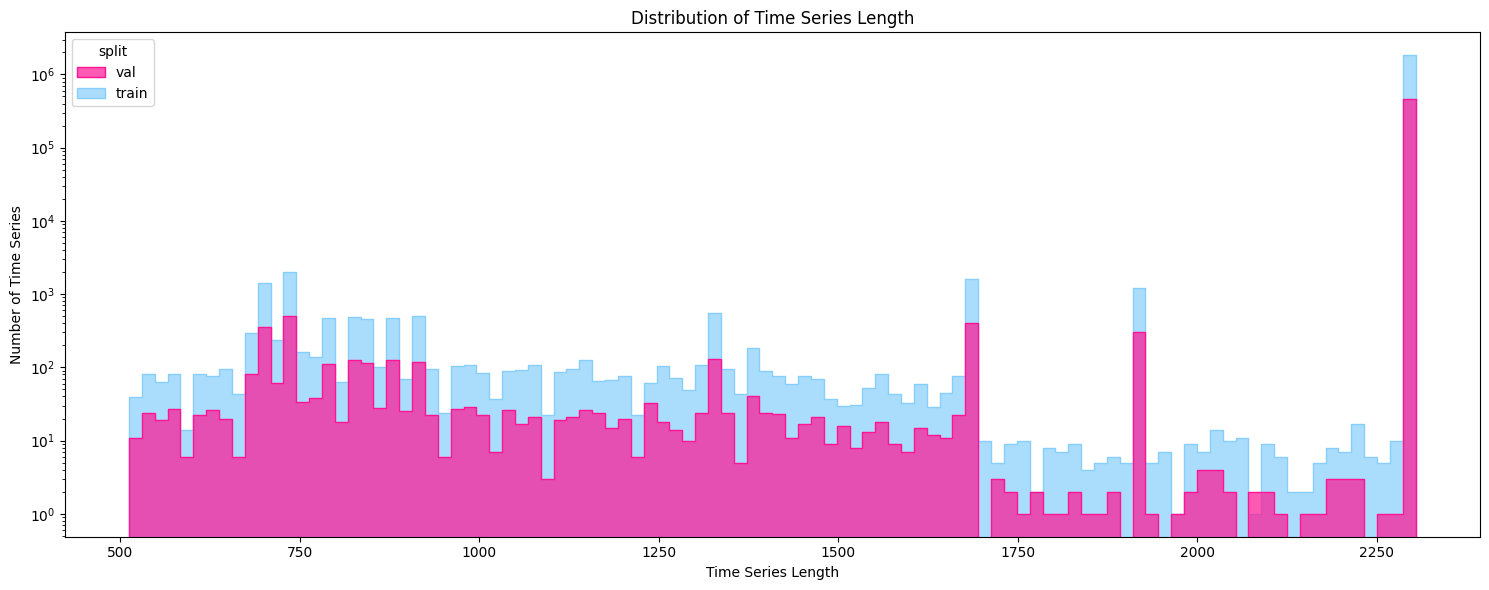

In [28]:
# === 2. Histogram: Time series length (ts_len) distribution ===
plt.figure()
sns.histplot(
    data=df, x="ts_len", hue="split", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["val", "train"])
plt.title("Distribution of Time Series Length")
plt.xlabel("Time Series Length")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
#plt.savefig("figures/plot_ts_len_splitted_distribution.pdf")
plt.show()

In [29]:
len(df), len(df[df["ts_len"] >= 512]), len(df[df["ts_len"] < 512])

(2302218, 2302218, 0)

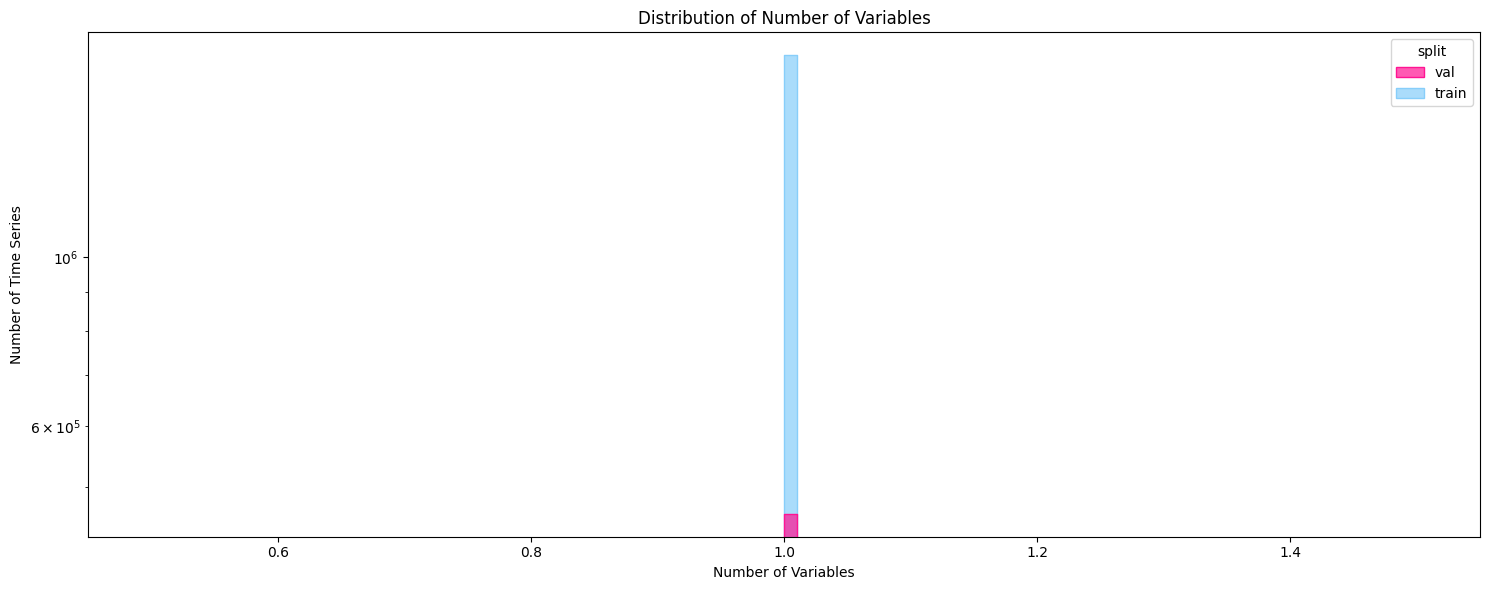

In [ ]:
# === 3. Histogram: Number of variables per time series ===
plt.figure()
sns.histplot(
    data=df, x="num_variates", hue="split", element="step", stat="count",
    common_norm=False, bins=100, palette=GROUP_PALETTE, alpha=0.7,
    hue_order=["val", "train"])
plt.title("Distribution of Number of Variables")
plt.xlabel("Number of Variables")
plt.ylabel("Number of Time Series")
plt.yscale("log")
plt.tight_layout()
#plt.savefig("figures/plot_num_variates_splitted_distribution.pdf")
plt.show()